# CIS 545 Final Project : Fraud Prediction using Elliptic Data

# 1.Introduction

**limitation of systematic regulation and policy on cryptocurrency**
Several recent illegal money laundering scandals brought the attention that appropriate anti-money laundering (AML) procedures are increasingly required and requested by financial institutions to comply with regulations (European Union, 2018). The decentralized nature of the peer to peer network designed Bitcoin affords the user anonymity and bypasses the central authority used to regulate traditional financial systems.     

- Relevant components to illicit transaction from previous fraud detection analysis

  * In and out transactions and rate of txs.
  * transaction amount
  * frequency of transaction over time_period





## 1.1 Project Goal

__Project Aim__ : Develop models to classify licit and illicit transactions in bitcoin network

__Why is it interesting__

As per the associated paper’s background, being able to identify licit and illicit transactions will enable more robust regulation of the use of the bitcoin network and possibly other digital currency networks. This will help to boost confidence in the legitimacy of these currencies and also improve equitable access to these financial services.

Additionally, the use of graphical data is a relatively untapped area in machine learning. Learning how to represent graphical data in more traditional forms and also how new network structures like Graph Convolutional Networks function will be very educational in its own right. Furthermore, the set of unlabeled data provides the opportunity to learn about semi-supervised learning as well.

__Challenges__

The dataset is imbalanced (10% Illicit cases vs. licit) and still around 75% of data are unlabelled. Some of the features in the dataset are anonymised, which will make it harder to understand the data. Additionally, GCNs and other network structures for graphical data are probably newer and less accessible in terms of understanding and package implementations than other structures.

__Types of models__

Logistic regression
SVM
Random forest
GCNs and other graphical neural networks

__Data set__

from https://www.kaggle.com/ellipticco/elliptic-data-set


__Reference__



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/project/CIS545_ Elliptic_Bitcoin Project"

 1908.02591.pdf		        elliptic_txs_classes.csv
'CIS545 Project Proposal.pdf'   elliptic_txs_edgelist.csv
 data.ipynb		        elliptic_txs_features.csv
 elliptic_EDA.ipynb	       'Time Schedule .xlsx'


In [ ]:
## Install required packages
## REQUIREMENT for SPARK??

# %%capture
# !pip install pandasql

In [ ]:
# !apt install libkrb5-dev
# !wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
# !tar xf spark-2.4.5-bin-hadoop2.7.tgz
# !pip install findspark
# !pip install sparkmagic
# !pip install pyspark
# !pip install pyspark --user
# !pip install seaborn --user
# !pip install plotly --user

In [ ]:
# from pyspark.sql import SparkSession
# from pyspark.sql.types import *
# import pyspark.sql.functions as F
# import os

# spark = SparkSession.builder.appName('project').getOrCreate()

In [ ]:
# %load_ext sparkmagic.magics

In [ ]:
# #graph section
# import networkx as nx
# # SQLite RDBMS
# import sqlite3

# # Parallel processing
# # import swifter
# import pandas as pd

# # # NoSQL DB
# # from pymongo import MongoClient
# # from pymongo.errors import DuplicateKeyError, OperationFailure

# import os
# os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# import pyspark
# from pyspark.sql import SQLContext

In [ ]:
# try:
#     if(spark == None):
#         spark = SparkSession.builder.appName('Initial').getOrCreate()
#         sqlContext=SQLContext(spark)
# except NameError:
#     spark = SparkSession.builder.appName('Initial').getOrCreate()
#     sqlContext=SQLContext(spark)

## 1.2 Elliptic Data Set

The Elliptic Dataset is a graph network of Bitcoin transactions with handcrafted features. All features are constructed using only publicly available information.

The Elliptic DataSet maps Bitcoin transactions to real entities in two categories:

- __Licit__: exchanges, wallet providers, miners, licit services, etc.
- __Ilicit__: scams, malware, terrorist, organization, ransomware, Ponzi shcemes, etc
A given transaction is licit if the entity that generated it was licit.

- **Graph** 
  - __Nodes__ : 203,769 node transactions 
  - __Edges__ : 234,355 directed edge payments flows. 
  - 2% are ilicit (Class 1), 21% are licit (Class 2)

- __Features__ 166 features in each node.
  - 94 features : local information (timestep, number of inputs/outputs, transaction fee, output volume and aggregated figures) 
    - normalized with range of numbers 
  - 72 features : aggregated features (obtained by aggregating transaction information such as maximum, minimum, standard deviation, correlation coefficients of one hop neighbor transactions).
  - visible feature : Tx id, Time_stamp

- __Temporal Information__ 
  - 49 distinct timesteps evenly spaced with an interval of 2 weeks associated with each node, when the transaction is confirmed.


- __Data Files__
  - elliptic_txs_edgelist.csv contains graph edges information;
  - elliptic_txs_classes.csv contains information about legality of transactions;
  - elliptic_txs_features.csv contains information about transaction features; 

# 2.Exploratory Data Analysis




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import time


import networkx as nx
%matplotlib inline
# import pandasql as ps  #SQL on Pandas Dataframe

## 2.1 Load datasets for classes, features and edgelist

* overview values and features in each datasest

* NOTE : CHECK file path to access


In [ ]:
df_classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/CIS545_ Elliptic_Bitcoin Project/elliptic_txs_classes.csv')
df_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/CIS545_ Elliptic_Bitcoin Project/elliptic_txs_features.csv', header=None)
df_edgelist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/CIS545_ Elliptic_Bitcoin Project/elliptic_txs_edgelist.csv')

### Load class_data 
* Label unknown tx to '0', '1' : illicit, '2': licit
* There are 4545 transactions marked as illicit, 42019 transactions marked as licit, and 157205 transactions that we must use to figure out the classes they belong to.
* No null value 

,txId
class,
0,157205
1,4545
2,42019


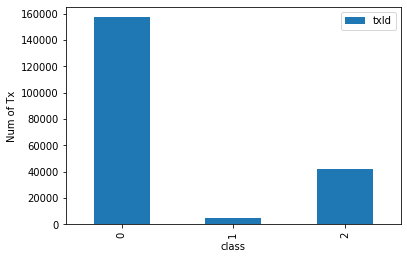

In [ ]:
# 0 : unknown , 1 : illicit, 2: licit

df_classes['class'] = df_classes['class'].apply(lambda x: '0' if x == "unknown" else x)
count_df = df_classes.groupby('class').count()
display(count_df, count_df.plot(kind='bar', xlabel='class', ylabel='Num of Tx'))


In [ ]:
df_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


### Load the transaction dataset
* rename Features ( its own transaction features + aggregated features for neighboring transactions) 
* There are 94 tx_features  and 72 neighbor_tx_features, which columns are named col_self_feat and col_agg_feat, respectively for further use and txID, time_step  
* There are no null values


In [ ]:
col_self_feat = [f'self_feat_{i}' for i in range(93)]
col_agg_feat = [f'agg_feat_{i}' for i in range(72)]
df_features.columns = ['txId', 'time_step'] + col_self_feat + col_agg_feat

df_features.head(5)

,txId,time_step,self_feat_0,self_feat_1,self_feat_2,self_feat_3,self_feat_4,self_feat_5,self_feat_6,self_feat_7,self_feat_8,self_feat_9,self_feat_10,self_feat_11,self_feat_12,self_feat_13,self_feat_14,self_feat_15,self_feat_16,self_feat_17,self_feat_18,self_feat_19,self_feat_20,self_feat_21,self_feat_22,self_feat_23,self_feat_24,self_feat_25,self_feat_26,self_feat_27,self_feat_28,self_feat_29,self_feat_30,self_feat_31,self_feat_32,self_feat_33,self_feat_34,self_feat_35,self_feat_36,self_feat_37,...,agg_feat_32,agg_feat_33,agg_feat_34,agg_feat_35,agg_feat_36,agg_feat_37,agg_feat_38,agg_feat_39,agg_feat_40,agg_feat_41,agg_feat_42,agg_feat_43,agg_feat_44,agg_feat_45,agg_feat_46,agg_feat_47,agg_feat_48,agg_feat_49,agg_feat_50,agg_feat_51,agg_feat_52,agg_feat_53,agg_feat_54,agg_feat_55,agg_feat_56,agg_feat_57,agg_feat_58,agg_feat_59,agg_feat_60,agg_feat_61,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,...,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.2

In [ ]:
# check number of null values and decide how to handle null depending on features.
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, txId to agg_feat_71
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


### Load edgelist dataset for graph 

*  txId1 : from node
*  txId2 : to node



In [ ]:
df_edgelist.head(3)

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870


In [ ]:
print('Total Num of Tx_nodes have out-going branch :',len(df_edgelist['txId1'].unique()))
print('Total Num of Tx_nodes have in-going branch :',len(df_edgelist['txId2'].unique()))

Total Num of Tx_nodes have out-going branch : 166345
Total Num of Tx_nodes have in-going branch : 148447


### Join df_classes and df_features on txId to create labeled_data

- preview_ illicit vs licit on different time_step 
- Trends of ratio of fraud ration over time_step

In [ ]:
# Fuction to draw ratio_graph between illicit vs. licit 
def ratio_graph(df):

  fig, ax = plt.subplots(2, 1, figsize=(10, 10))
  plt.subplots_adjust(hspace=0.4)

  
  temp_class = pd.crosstab(index=df['time_step'],columns=df['class'])
  temp_class.plot(kind='bar', stacked=True, ax=ax[0],\
                      title='Number of transactions per time interval', ylabel='Number of txs')
  
  
  temp_class_div = temp_class.div(temp_class.sum(1).astype(float),axis=0) 
  temp_class_div.plot(kind='bar', stacked=True,ax=ax[1], \
                      title='Percentage of transactions per time interval',ylabel='Pct of txs')

  # decrease number of ticks per x axis
  for i in range(len(ax)):
    for index, label in enumerate(ax[i].get_xticklabels()):
        if index % 4 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

  

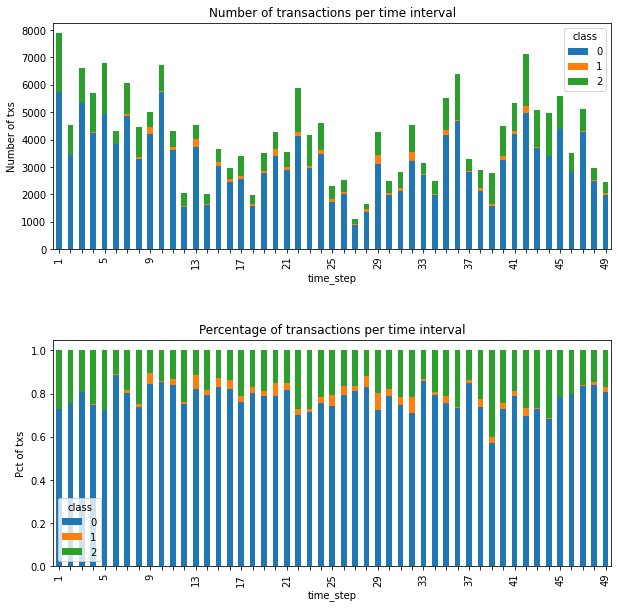

In [ ]:
labeled_data = df_features.merge(df_classes, on = 'txId')
ratio_graph(labeled_data)

### Example of Graph visualization using networkx

In [ ]:
sample_ids = all_data.loc[(all_data['time_step'] ==18)  & (all_data['class']=='1'), 'txId']
short_edges = df_edgelist.loc[df_edgelist['txId1'].isin(sample_ids)]

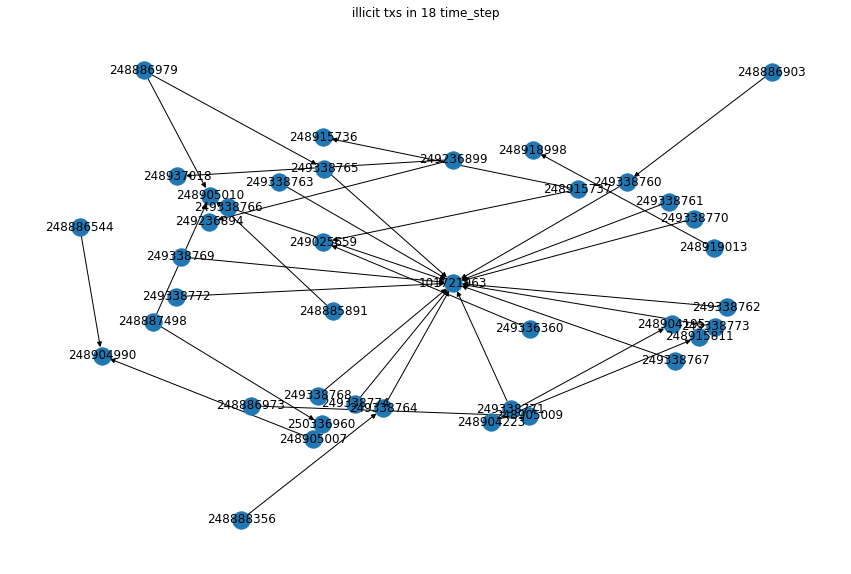

In [ ]:
fig, axe = plt.subplots(figsize=(15,10))
axe.set_title(' illicit txs in 18 time_step ')

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.kamada_kawai_layout(graph)
nx.draw(graph,ax=axe, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos )


## 2.2 Create columns of out_degree and in_degree for each transaction

 * Extracted features from edgelist dataset :'out_degree', 'in_degree'
 * __NOTE__ : Branching information is already included in local features, we don't need to add for our further ML/DL analysis

In [ ]:
out_degree = df_edgelist.groupby(['txId1'],as_index=False).count()
out_degree.sort_values('txId2', ascending=False)

,txId1,txId2
1396,2984918,472
53,89273,288
54,102570,122
2,3181,112
7,7952,99
...,...,...
64850,106306421,1
64849,106306420,1
64848,106306410,1
64846,106306403,1


In [ ]:
in_degree=df_edgelist.groupby(['txId2'],as_index=False).count()
in_degree.sort_values('txId1', ascending=False)

,txId2,txId1
21165,43388675,284
29338,68705820,247
15268,30699343,241
50059,96576418,239
98723,225859042,212
...,...,...
53216,98846334,1
53215,98846330,1
53214,98846327,1
53213,98846324,1


* Merge degree features into labeled_data : 'out_degree' and 'in_degree'
* all nodes that don't have branches(in or out) are filled with '0'

In [ ]:
out_merged = labeled_data.merge(out_degree, how='outer', left_on=labeled_data['txId'], right_on=out_degree['txId1'])
out_merged=out_merged.rename(columns={'txId2':'out_degree'}).drop(columns={'key_0','txId1'})
out_merged.head()

,txId,time_step,self_feat_0,self_feat_1,self_feat_2,self_feat_3,self_feat_4,self_feat_5,self_feat_6,self_feat_7,self_feat_8,self_feat_9,self_feat_10,self_feat_11,self_feat_12,self_feat_13,self_feat_14,self_feat_15,self_feat_16,self_feat_17,self_feat_18,self_feat_19,self_feat_20,self_feat_21,self_feat_22,self_feat_23,self_feat_24,self_feat_25,self_feat_26,self_feat_27,self_feat_28,self_feat_29,self_feat_30,self_feat_31,self_feat_32,self_feat_33,self_feat_34,self_feat_35,self_feat_36,self_feat_37,...,agg_feat_34,agg_feat_35,agg_feat_36,agg_feat_37,agg_feat_38,agg_feat_39,agg_feat_40,agg_feat_41,agg_feat_42,agg_feat_43,agg_feat_44,agg_feat_45,agg_feat_46,agg_feat_47,agg_feat_48,agg_feat_49,agg_feat_50,agg_feat_51,agg_feat_52,agg_feat_53,agg_feat_54,agg_feat_55,agg_feat_56,agg_feat_57,agg_feat_58,agg_feat_59,agg_feat_60,agg_feat_61,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class,out_degree
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0,1.0
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0,1.0
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0,2.0
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,...,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085

In [ ]:

all_data = out_merged.merge(in_degree, how='outer', left_on=out_merged['txId'], right_on=in_degree['txId2'])
all_data=all_data.rename(columns={'txId1':'in_degree'}).drop(columns={'key_0','txId2'})
all_data=all_data.fillna(0)
all_data.set_index('txId')

,time_step,self_feat_0,self_feat_1,self_feat_2,self_feat_3,self_feat_4,self_feat_5,self_feat_6,self_feat_7,self_feat_8,self_feat_9,self_feat_10,self_feat_11,self_feat_12,self_feat_13,self_feat_14,self_feat_15,self_feat_16,self_feat_17,self_feat_18,self_feat_19,self_feat_20,self_feat_21,self_feat_22,self_feat_23,self_feat_24,self_feat_25,self_feat_26,self_feat_27,self_feat_28,self_feat_29,self_feat_30,self_feat_31,self_feat_32,self_feat_33,self_feat_34,self_feat_35,self_feat_36,self_feat_37,self_feat_38,...,agg_feat_35,agg_feat_36,agg_feat_37,agg_feat_38,agg_feat_39,agg_feat_40,agg_feat_41,agg_feat_42,agg_feat_43,agg_feat_44,agg_feat_45,agg_feat_46,agg_feat_47,agg_feat_48,agg_feat_49,agg_feat_50,agg_feat_51,agg_feat_52,agg_feat_53,agg_feat_54,agg_feat_55,agg_feat_56,agg_feat_57,agg_feat_58,agg_feat_59,agg_feat_60,agg_feat_61,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class,out_degree,in_degree
txId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,...,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0,1.0,1.0
5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,...,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0,1.0,1.0
232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,...,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0,2.0,1.0
232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,0.026315,...,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.0


 * Let's see the ratio of illicit vs licit 
 * dataset with different number of in or out degree transactions : single in/out or multi in/out ( over 3 branch count) 
 * __NOTE__ : this was my curiousity on relation with degree/ We can cut this out later. 


In [ ]:
single_in_txs = all_data.loc[(all_data['out_degree']==0) & (all_data['in_degree']==1)]
single_out_txs = all_data.loc[(all_data['out_degree']==1) & (all_data['in_degree']==0)]
in_out_txs = all_data.loc[(all_data['out_degree']!=0) & (all_data['in_degree']!=0)]

multi_in_txs = all_data.loc[(all_data['out_degree']==0) & (all_data['in_degree']>3)]
multi_out_txs = all_data.loc[(all_data['out_degree']>3) & (all_data['in_degree']==0)]

multi_branch_txs = all_data.loc[(all_data['out_degree']>3) & (all_data['in_degree']>3)]

multi_out_txs.shape
# multi_in_txs[multi_in_txs['class']=='1']

(1596, 170)

* There no illicit transaction having multiple out_degree

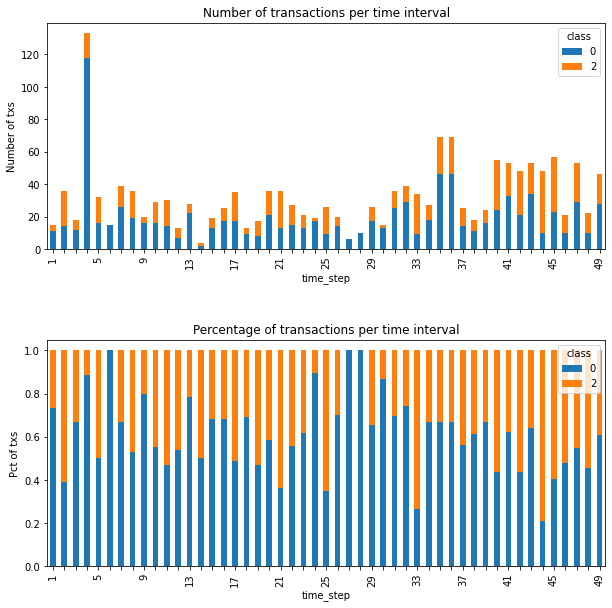

In [ ]:
ratio_graph(multi_out_txs)


## 2.3 Plot the correlation for features
  * all features are hidden, but some of them can be connected 

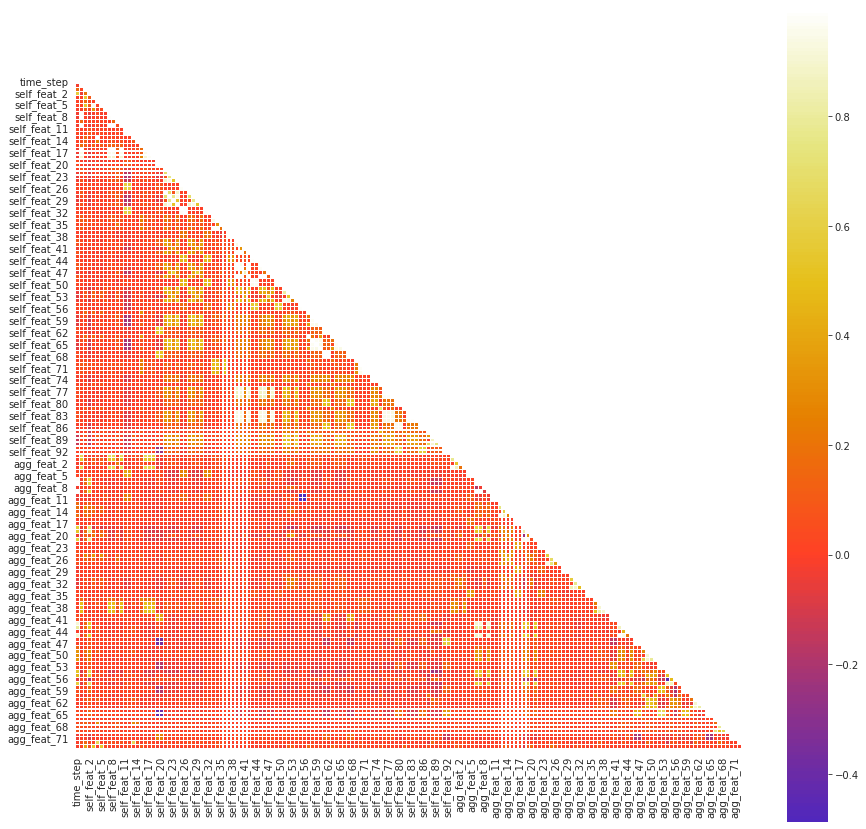

In [ ]:
df= all_data.reset_index().drop(columns={'txId','index'})
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

- Quick view of correlation 

In [ ]:
corr_time = all_data.reset_index().drop(columns={'txId','index'}).corr()['time_step'].drop('time_step')
corr_time.sort_values(ascending=False).head(10)

agg_feat_7     0.994448
agg_feat_9     0.992579
agg_feat_6     0.982430
agg_feat_42    0.911859
agg_feat_45    0.890583
agg_feat_43    0.788108
agg_feat_21    0.580025
self_feat_2    0.573155
agg_feat_57    0.571132
agg_feat_18    0.562550
Name: time_step, dtype: float64

In [ ]:
corr_time.sort_values(ascending=True).head(10)

self_feat_89   -0.137035
self_feat_90   -0.131872
self_feat_88   -0.129163
self_feat_66   -0.068068
self_feat_60   -0.068055
self_feat_65   -0.067109
self_feat_59   -0.067097
self_feat_53   -0.065981
agg_feat_56    -0.065844
agg_feat_32    -0.057592
Name: time_step, dtype: float64

- **Examples** :  Distribution of feature-values in over time_steps or classes

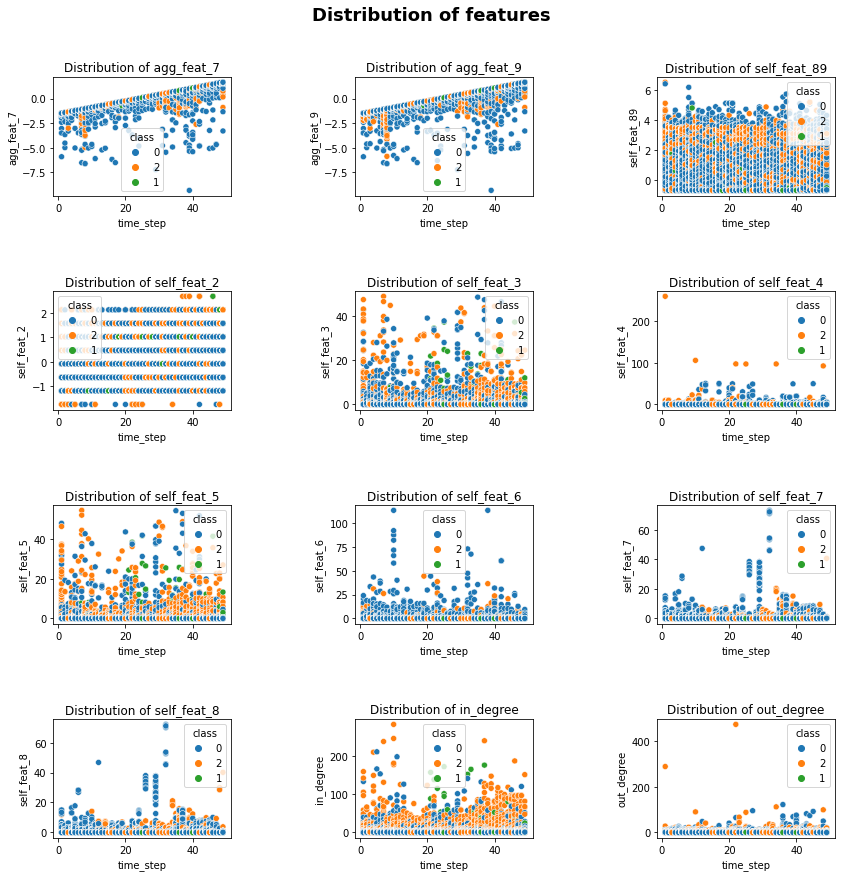

In [ ]:
# Investigate the distribution of our features using scatterplot over time_step
b=20
columns=all_data.columns
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.scatterplot(ax = axes[0,0], data=all_data, y='agg_feat_7', x='time_step',hue='class')
ax.set_title(f'Distribution of agg_feat_7')

ax1 = sns.scatterplot(ax = axes[0,1], data=all_data, y="agg_feat_9",x='time_step',hue='class')
ax1.set_title(f'Distribution of agg_feat_9')

ax2 = sns.scatterplot(ax = axes[0,2], data=all_data, y="self_feat_89",x='time_step',hue='class')
ax2.set_title(f'Distribution of self_feat_89')

ax3 = sns.scatterplot(ax = axes[1,0], data=all_data, y=columns[4],x='time_step',hue='class')
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.scatterplot(ax = axes[1,1], data=all_data, y=columns[5],x='time_step',hue='class')
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.scatterplot(ax = axes[1,2], data=all_data, y=columns[6],x='time_step',hue='class')
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.scatterplot(ax = axes[2,0], data=all_data, y=columns[7],x='time_step',hue='class')
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.scatterplot(ax = axes[2,1], data=all_data, y=columns[8],x='time_step',hue='class')
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.scatterplot(ax = axes[2,2], data=all_data, y=columns[9],x='time_step',hue='class')
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.scatterplot(ax = axes[3,0], data=all_data, y=columns[10],x='time_step',hue='class')
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.scatterplot(ax = axes[3,1], data=all_data, y='in_degree',x='time_step',hue='class')
ax10.set_title(f'Distribution of in_degree')

ax11 = sns.scatterplot(ax = axes[3,2], data=all_data, y='out_degree',x='time_step',hue='class')
ax11.set_title(f'Distribution of out_degree')
 

plt.show()

 * **QUESTION : HOW TO ENGINEER the features? There are broad range of values for some features. Influence on ML/DL ??** 

Text(0.5, 1.0, 'Distribution of out_degree')

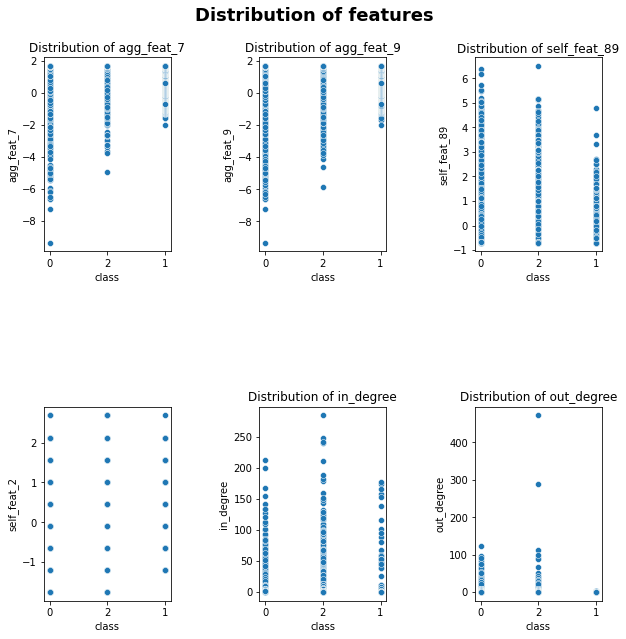

In [ ]:
# Investigate the distribution of our features using scatterplot over time_step
b=20
columns=all_data.columns
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')


ax = sns.scatterplot(ax = axes[0,0], data=all_data, y='agg_feat_7', x='class')
ax.set_title(f'Distribution of agg_feat_7')

ax1 = sns.scatterplot(ax = axes[0,1], data=all_data, y="agg_feat_9",x='class')
ax1.set_title(f'Distribution of agg_feat_9')

ax2 = sns.scatterplot(ax = axes[0,2], data=all_data, y="self_feat_89",x='class')
ax2.set_title(f'Distribution of self_feat_89')

ax3 = sns.scatterplot(ax = axes[1,0], data=all_data, y=columns[4],x='class')

ax10 = sns.scatterplot(ax = axes[1,1], data=all_data, y='in_degree',x='class')
ax10.set_title(f'Distribution of in_degree')

ax11 = sns.scatterplot(ax = axes[1,2], data=all_data, y='out_degree',x='class')
ax11.set_title(f'Distribution of out_degree')


# 3.Logistic Regression




 * only choose labeled data






In [ ]:
data = labeled_data[all_data['class'] != '0']
data.shape

(46564, 168)

In [ ]:
data.dtypes

txId             int64
time_step        int64
self_feat_0    float64
self_feat_1    float64
self_feat_2    float64
                ...   
agg_feat_68    float64
agg_feat_69    float64
agg_feat_70    float64
agg_feat_71    float64
class           object
Length: 168, dtype: object



* Let convert labels to int type and assign the illicit class label to 0 and  the licit class label to 1

In [ ]:
# create features and target data
X = data.drop(['class','time_step','txId'], axis = 1)
y = data['class'].astype(int)-1 
print('The total shape of the data:', X.shape)
print('The number of illicit 0 and licit 1 samples')
print(y.value_counts())

The total shape of the data: (46564, 165)
The number of illicit 0 and licit 1 samples
1    42019
0     4545
Name: class, dtype: int64





## 3.1 Let create balanced data by undersampling


> * Data is highly unbalanced. There are 42019 samples labeled as 'licit' and 4545 samples labeled as 'illicit.' Hence, we shall resample the data to balance numbers of positive and negative samples.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_re, y_re = rus.fit_resample(X, y)
print(X_re.shape)

(9090, 165)


## 3.2 PCA (rescale and try to decrease dimensions of data

In [ ]:
from sklearn.preprocessing import StandardScaler as SC
from sklearn.decomposition import PCA
X_sc = SC().fit_transform(X_re)
pca = PCA().fit(X_sc)
X_pca = pca.transform(X_sc)
var_cum = 0  # total varience from all components
num_comp = 0        # the number of components with 95% varience
for var in pca.explained_variance_ratio_:
    if var_cum > 0.95:
        print('The total varience', var_cum)
        print('The number of components to keep', num_comp)
        break
    else:
        var_cum += var
        num_comp += 1

The total varience 0.9515189356390131
The number of components to keep 58


#### But at the first, let train the model with all components

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_re, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mse_test = mean_squared_error(y_pred,y_test)

regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

svc = SVC(kernel="linear", C = 2).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('(illicit) precision_score =', precision_score(y_test, y_pred, pos_label = 0))
print('(illicit) recall_score =', recall_score(y_test, y_pred, pos_label = 0))

confusion_matrix(y_test, y_pred)

(illicit) precision_score = 0.8934782608695652
(illicit) recall_score = 0.9082872928176795


array([[822,  83],
       [ 98, 815]])

#### Now, let compare two classifiers: Random Forest and SVC.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('(illicit) precision_score =', precision_score(y_test, y_pred, pos_label = 0))
print('(illicit) recall_score =', recall_score(y_test, y_pred, pos_label = 0))

confusion_matrix(y_test, y_pred)

(illicit) precision_score = 0.9768339768339769
(illicit) recall_score = 0.8386740331491712


array([[759, 146],
       [ 18, 895]])

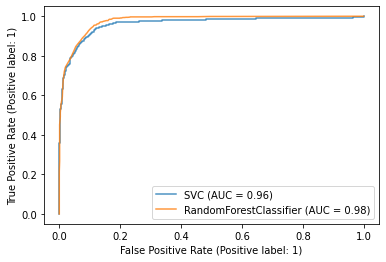

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#### Let try to find ou clusters in our data
Before applying K-means to our data, we will yse the PCA to obtaine the most siginificant features from data set

In [ ]:
%%time
# Scale and transform the txs_df
txs_scaled = SC().fit_transform(data)
pca = PCA().fit(txs_scaled)
txs_pca = pca.transform(txs_scaled)
var_cum = 0  # total varience from all components
num_comp = 0        # the number of components with 95% varience
for var in pca.explained_variance_ratio_:
    if var_cum > 0.95:
        print('The total varience', var_cum)
        print('The number of components to keep', num_comp)
        break
    else:
        var_cum += var
        num_comp += 1

The total varience 0.9500596336075151
The number of components to keep 60
CPU times: user 3.03 s, sys: 577 ms, total: 3.61 s
Wall time: 2.59 s


Notice the difference in the number of significant components between PCA on reduced set X_re (balanced labeled set) and the PCA for the whole set txs_df: 59 and 60, respectively.

In [ ]:
%%time
# K-mens on the txs_pca first 60 compopnents
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters = 2, n_init=4, random_state = 42)
txs_cl = kmeans.fit_transform(txs_pca[:,:60])



CPU times: user 896 ms, sys: 12 ms, total: 908 ms
Wall time: 490 ms


Predicted distribution between clusters

In [ ]:
print('licit transactions:', (kmeans.labels_ == 0).sum())
print('illicit transactions:', (kmeans.labels_ == 1).sum())

Now, we want to compare labeled trabsactions in raw_data with clusters

In [ ]:
y_true = all_data['class'].apply(lambda x: 1 if x == '1'\
                                 else (0 if x == '2' else 3)).values
y_pred = kmeans.labels_
# confusion_matrix(y_pred, y_true)

In [ ]:
y_true[:20]

In [ ]:
y_pred[:20]

# Supervised Machine Learning 

# Deep Learning

## [OPTIONAL] 
